## Video analog gauge reader

step-by-step guide notebook for live detecton of analog gauge

see [reference](https://github.com/intel-iot-devkit/python-cv-samples/tree/master/examples/analog-gauge-reader) for more detail

steps:
1. get ROI of video source
2. verify detection (may need fine tuning)
3. run video detection

In [1]:
import cv2
import numpy as np
import time

from PIL import Image
import matplotlib.pyplot as plt

from gauge_reader import detectCircle, detectLine, get_current_value
from gauge_utils import drawImage, cropImage

### capture video source

capture video source to get ROI

In [2]:
# sample saved image 
gauge_img = './_captured.jpg'

In [3]:
### capture camera
###  q: quit
###  c: capture

#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture("rtsp://<ip>")
cap = cv2.VideoCapture("./sample/sample.avi")

print('width: {0}, height: {1}'.format(cap.get(3),cap.get(4)))

while(cap.isOpened()):
    ret, frame = cap.read()
    if (ret):
        
        cv2.imshow('frame', frame)
        
        key = cv2.waitKey(1) & 0xFF
            
        if (key == ord('q')):
            break
        elif (key == ord('c')):
            cv2.imwrite(gauge_img, frame)
            break
            
    # comment this if you're using live stream source
    time.sleep(0.1)
    
cap.release()
cv2.destroyAllWindows()

width: 640.0, height: 480.0


### verify detection

In [4]:
#for testing purposes: hardcode and comment out raw_inputs above
min_r = 0.35
max_r = 0.48

min_angle = 40
max_angle = 310
min_value = 0
max_value = 100
units = "%"

cx1 = 196
cy1 = 98
cx2 = 467
cy2 = 360

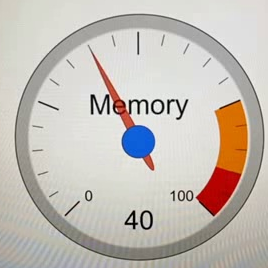

191, 91, 459, 359


In [5]:
### crop image to get ROI (region of interest)
###  q: quit
###  c: crop
###  r: restart

full_img = cv2.imread(gauge_img)

#img = full_img
pt = cropImage(full_img)

img = full_img[pt[0][1]:pt[1][1], pt[0][0]:pt[1][0]]
drawImage(img)

#cimg = full_img.copy()
#cv2.rectangle(cimg, (pt[0][0],pt[0][1]), (pt[1][0],pt[1][1]),(0, 255, 0), 2)
#drawImage(cimg)

# crop area
print("%d, %d, %d, %d" % (pt[0][0],pt[0][1], pt[1][0],pt[1][1]))
cx1 = pt[0][0]
cy1 = pt[0][1]
cx2 = pt[1][0]
cy2 = pt[1][1]

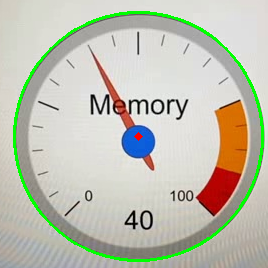

center & radious of circle 138 136 124


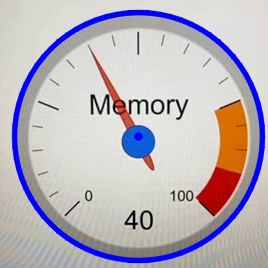

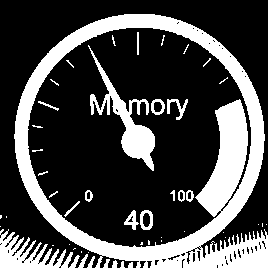

number of lines detected: 25


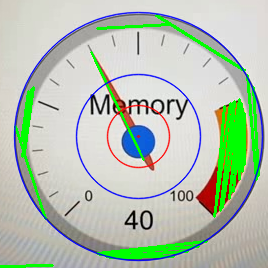

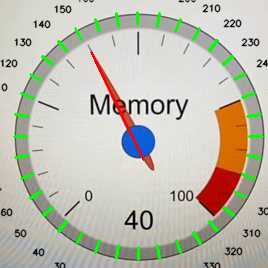

Reading: 41 %


In [6]:
# parameters
## min/max radius for detecting circle
min_r = 0.35
max_r = 0.48

min_angle = 40
max_angle = 310
min_value = 0
max_value = 100
units = "%"

x, y, r = detectCircle(img, min_r, max_r, True, False)

# fine tune parameter minLineLength = 50 (default 100)
final_line_list = detectLine(img, x, y, r, 50, True, True, False)

if (len(final_line_list) > 0):
    value = get_current_value(img, final_line_list, min_angle, max_angle, min_value, max_value, x, y, r)
    print("Reading: %.0f %s" % (value, units))
else:
    print("no detection")

### Live detection

In [ ]:
### capture camera
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture("rtsp://<ip>")
cap = cv2.VideoCapture("./sample/sample.avi")

print('width: {0}, height: {1}'.format(cap.get(3),cap.get(4)))

prev_time = 0
FPS = 2
fbuff = None

while(cap.isOpened()):
    ret, frame = cap.read()
    curr_time = time.time() - prev_time
    if (ret) and (curr_time > 1./FPS):
        prev_time = time.time()
        
        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)       
        try:
            img = frame[cy1:cy2, cx1:cx2]
            
            x, y, r = detectCircle(img, min_r, max_r)

            final_line_list = detectLine(img, x, y, r, 50)

            value = 0
            if (len(final_line_list) > 0):
                value = get_current_value(img, final_line_list, min_angle, max_angle, min_value, max_value, x, y, r)

                x1 = final_line_list[0][0]+cx1
                y1 = final_line_list[0][1]+cy1
                x2 = final_line_list[0][2]+cx1
                y2 = final_line_list[0][3]+cy1
                cv2.line(frame, (x1, y1), (x2, y2),(0, 255, 0), 2)            

                cv2.putText(frame, "Mem %.0f %s" % (value, units), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

                # highlights
                cv2.imshow('frame', frame)

        except:
            print("exception occured")

        # highlights
        cv2.imshow('frame', frame)
            
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    elif not ret:
        break
        
    # comment this if you're using live stream source
    time.sleep(0.1)

cap.release()
cv2.destroyAllWindows()


### record video

In [ ]:
### capture camera
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture("rtsp://<ip>")

print('width: {0}, height: {1}'.format(cap.get(3),cap.get(4)))

prev_time = 0
FPS = 2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if (ret):
     
        try:
            img = frame[cy1:cy2, cx1:cx2]
            
            x, y, r = detectCircle(img, min_r, max_r)

            final_line_list = detectLine(img, x, y, r, 50)

            value = 0
            if (len(final_line_list) > 0):
                value = get_current_value(img, final_line_list, min_angle, max_angle, min_value, max_value, x, y, r)

                x1 = final_line_list[0][0]+cx1
                y1 = final_line_list[0][1]+cy1
                x2 = final_line_list[0][2]+cx1
                y2 = final_line_list[0][3]+cy1
                cv2.line(frame, (x1, y1), (x2, y2),(0, 255, 0), 2)            

                cv2.putText(frame, "Mem %.0f %s" % (value, units), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

                # highlights
                out.write(frame)
                cv2.imshow('frame', frame)

        except:
            print("exception occured")
            
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()